In [1]:
#importing the required libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the fashion_mnist dataset
data = keras.datasets.fashion_mnist

#dividing the data into testing and training
(train_images,train_labels),(test_images,test_labels)=data.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(type(train_images))
print(train_images[0]) # how the real data looks in the dataset fashion_mnist
""" the data is probably a color coded pixels 0-255"""

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   

' the data is probably a color coded pixels 0-255'

(28, 28)
(60000, 28, 28)


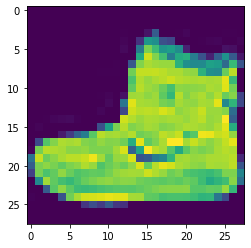

In [5]:
plt.imshow(train_images[0])#plotting it in graph we can see it represents some clothing material

print(train_images[0].shape)#each data is a matrix of 28x28

print(train_images.shape)#there are exactly 60000 rows in our dataset with each row of 28x28 matrix

In [6]:
#gives you a better idea how the data is present in your dataset
l1 = np.array([
    
               [[1,2,3],[3,4,5],[3,4,5],[3,4,5]],
               [[1,2,3],[3,4,5],[3,4,5],[3,4,5]]
    
              ])
print(l1.shape)

l1 = l1/5.0
print(l1)

(2, 4, 3)
[[[0.2 0.4 0.6]
  [0.6 0.8 1. ]
  [0.6 0.8 1. ]
  [0.6 0.8 1. ]]

 [[0.2 0.4 0.6]
  [0.6 0.8 1. ]
  [0.6 0.8 1. ]
  [0.6 0.8 1. ]]]


In [7]:
#we need to scale the data to a lower value to be used efficiently beacuse the 
#weights and biases set to vary from 0 to 1 so the data should also be in those ranges

train_images = train_images/255.0
test_images = test_images/255.0

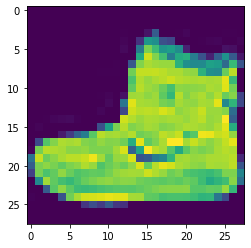

In [8]:
#to confirm the data is the same as it was we will look at the image again
plt.imshow(train_images[0])

In [9]:
#but now the data is efficient to use take a look
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [10]:
#creating the model with relu as activation function
model_relu = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"), 
    keras.layers.Dense(10,activation="softmax") #softmax: gives you the probabilities it thinks the data belongs to each class
])

model_relu.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model_relu.fit(train_images,train_labels,epochs=5)#you can tweak the number of epochs to get better results
test_loss_relu,test_acc_relu = model_relu.evaluate(test_images,test_labels)
print("Test Acc for relu:",test_acc_relu)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 443us/sample - loss: 0.5004 - accuracy: 0.8259
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3760 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3351 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3127 - accuracy: 0.8847
Epoch 5/5
10000/10000 [==============================] - 1s 92us/sample - loss: 0.3365 - accuracy: 0.8793
Test Acc for relu: 0.8793


In [11]:
#creating the model with sigmoid as activation function
model_sigmoid = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="sigmoid"), 
    keras.layers.Dense(10,activation="softmax") #softmax: gives you the probabilities it thinks the data belongs to each class
])

model_sigmoid.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model_sigmoid.fit(train_images,train_labels,epochs=5)#you can tweak the number of epochs to get better results
test_loss_sigmoid,test_acc_sigmoid = model_sigmoid.evaluate(test_images,test_labels)
print("Test Acc for sigmoid:",test_acc_sigmoid)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5520 - accuracy: 0.8105
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3927 - accuracy: 0.8576
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3563 - accuracy: 0.8722
Epoch 4/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3303 - accuracy: 0.8797
Epoch 5/5
10000/10000 [==============================] - 1s 78us/sample - loss: 0.3551 - accuracy: 0.8729
Test Acc for sigmoid: 0.8729


In [12]:
#creating the model with tanh as activation function
model_tanh = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="tanh"), 
    keras.layers.Dense(10,activation="softmax") #softmax: gives you the probabilities it thinks the data belongs to each class
])

model_tanh.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model_tanh.fit(train_images,train_labels,epochs=5)#you can tweak the number of epochs to get better results
test_loss_tanh,test_acc_tanh = model_tanh.evaluate(test_images,test_labels)
print("Test Acc for tanh:",test_acc_tanh)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4794 - accuracy: 0.8274
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3705 - accuracy: 0.8654
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3350 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3149 - accuracy: 0.8848
Epoch 5/5
10000/10000 [==============================] - 1s 80us/sample - loss: 0.3691 - accuracy: 0.8674
Test Acc for tanh: 0.8674


In [13]:
#Relu model
relu_acc = []
for i in range(1,11):
    model_relu = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"), 
    keras.layers.Dense(10,activation="softmax") #softmax: gives you the probabilities it thinks the data belongs to each class
    ])

    model_relu.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
    model_relu.fit(train_images,train_labels,epochs=i)
    test_loss_relu_list,test_acc_relu_list = model_relu.evaluate(test_images,test_labels)
    relu_acc.append(test_acc_relu_list)
    

Train on 60000 samples
10000/10000 [==============================] - 1s 78us/sample - loss: 0.4479 - accuracy: 0.8372
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4948 - accuracy: 0.8267
Epoch 2/2
10000/10000 [==============================] - 2s 198us/sample - loss: 0.3842 - accuracy: 0.8608
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5074 - accuracy: 0.8220
Epoch 2/3
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3805 - accuracy: 0.8625
Epoch 3/3
10000/10000 [==============================] - 1s 77us/sample - loss: 0.3695 - accuracy: 0.8710
Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4935 - accuracy: 0.8265
Epoch 2/4
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3720 - accuracy: 0.8659
Epoch 3/4
60000/60000 [==============================] - 6s 96us

In [14]:
relu_train_accuracy=[0.8239, 0.8647, 0.8784,0.8864,0.8907,0.8959,0.9010,0.9056,0.9075,0.9110]

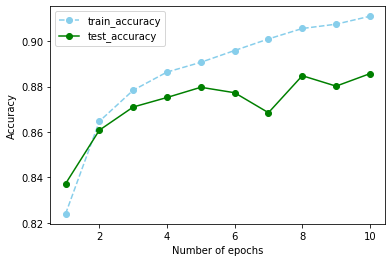

In [15]:
x = [i for i in range(1,11)]
y1 = relu_train_accuracy
y2 = relu_acc
plt.plot(x,y1,marker="o",color="skyblue",linestyle="dashed",label="train_accuracy")
plt.plot(x,y2,marker="o",color="green",label="test_accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

In [16]:
#Sigmoid model
sigmoid_test_acc = []
for i in range(1,11):
    model_sigmoid = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="sigmoid"), 
    keras.layers.Dense(10,activation="softmax") #softmax: gives you the probabilities it thinks the data belongs to each class
    ])

    model_sigmoid.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
    model_sigmoid.fit(train_images,train_labels,epochs=i)#you can tweak the number of epochs to get better results
    test_loss_sigmoid_list,test_acc_sigmoid_list = model_sigmoid.evaluate(test_images,test_labels)
    sigmoid_test_acc.append(test_acc_sigmoid_list)
    

Train on 60000 samples
10000/10000 [==============================] - 1s 132us/sample - loss: 0.4386 - accuracy: 0.8416
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5432 - accuracy: 0.8136
Epoch 2/2
10000/10000 [==============================] - 1s 85us/sample - loss: 0.4116 - accuracy: 0.8508
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5396 - accuracy: 0.8158
Epoch 2/3
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3915 - accuracy: 0.8587
Epoch 3/3
10000/10000 [==============================] - 1s 93us/sample - loss: 0.3712 - accuracy: 0.8689
Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 119us/sample - loss: 0.5430 - accuracy: 0.8142
Epoch 2/4
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3912 - accuracy: 0.8591
Epoch 3/4
60000/60000 [==============================] - 8s 128u

In [17]:
sigmoid_train_acc = [0.8163,0.8599,0.8709,0.8799,0.8874,0.8920,0.8961,0.8996,0.9022,0.9082]
sigmoid_test_acc

[0.8416, 0.8508, 0.8689, 0.864, 0.873, 0.875, 0.8762, 0.878, 0.8857, 0.8796]

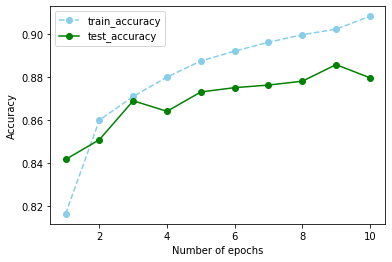

In [18]:
x = [i for i in range(1,11)]
y1 = sigmoid_train_acc
y2 = sigmoid_test_acc
plt.plot(x,y1,marker="o",color="skyblue",linestyle="dashed",label="train_accuracy")
plt.plot(x,y2,marker="o",color="green",label="test_accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

In [19]:
tanh_test_acc = []
for i in range(1,11):
    model_tanh = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="tanh"), 
    keras.layers.Dense(10,activation="softmax") #softmax: gives you the probabilities it thinks the data belongs to each class
    ])

    model_tanh.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model_tanh.fit(train_images,train_labels,epochs=i)#you can tweak the number of epochs to get better results
    test_loss_tanh_list,test_acc_tanh_list = model_tanh.evaluate(test_images,test_labels)
    tanh_test_acc.append(test_acc_tanh_list)
    

Train on 60000 samples
10000/10000 [==============================] - 1s 88us/sample - loss: 0.4350 - accuracy: 0.8437
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4738 - accuracy: 0.8312
Epoch 2/2
10000/10000 [==============================] - 1s 86us/sample - loss: 0.4021 - accuracy: 0.8570
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4767 - accuracy: 0.8294
Epoch 2/3
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3713 - accuracy: 0.8651
Epoch 3/3
10000/10000 [==============================] - 1s 83us/sample - loss: 0.3632 - accuracy: 0.8711
Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4764 - accuracy: 0.8293
Epoch 2/4
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3665 - accuracy: 0.8651
Epoch 3/4
60000/60000 [==============================] - 6s 105us

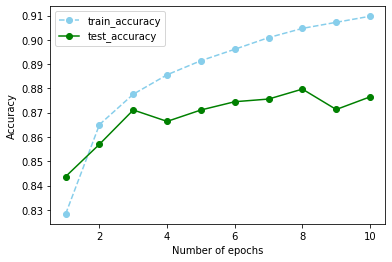

In [20]:
tanh_train_acc=[0.8283,0.8651,0.8776,0.8856,0.8914,0.8961,0.9009,0.9047,0.9072,0.9097]
x = [i for i in range(1,11)]
y1 = tanh_train_acc
y2 = tanh_test_acc
plt.plot(x,y1,marker="o",color="skyblue",linestyle="dashed",label="train_accuracy")
plt.plot(x,y2,marker="o",color="green",label="test_accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

In [21]:
#relu
a = [0.8239, 0.8647, 0.8784,0.8864,0.8907,0.8959,0.9010,0.9056,0.9075,0.9110]
b=  [0.8448,0.8512,0.8674,0.8673,0.8693,0.8836,0.8793,0.8790,0.8751,0.8870]
c=[]
for i in range(len(a)):
    c.append(abs(a[i]-b[i]))
print(c.index(min(c)))
abs(a[2]-b[2])

2


0.01100000000000001

In [22]:
#sigmoid
a=[0.8163,0.8599,0.8709,0.8799,0.8874,0.8920,0.8961,0.8996,0.9022,0.9082] #train accuracies
b=[0.8407,0.8515,0.8618,0.8663,0.8679,0.8763,0.8762,0.8804,0.8753,0.8823]
c=[]
for i in range(len(a)):
    c.append(abs(a[i]-b[i]))
print(c.index(min(c)))
abs(a[1]-b[1])

1


0.008399999999999963

In [23]:
#tanh
a=[0.8283,0.8651,0.8776,0.8856,0.8914,0.8961,0.9009,0.9047,0.9072,0.9097]
b=[0.8527,0.8594,0.8575,0.8669,0.8752,0.8734,0.8788,0.8752,0.8780,0.8716]
c=[]
for i in range(len(a)):
    c.append(abs(a[i]-b[i]))
print(c.index(min(c)))
abs(a[1]-b[1])

1


0.005699999999999927

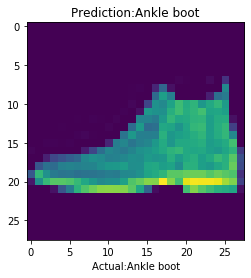

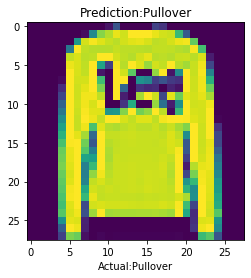

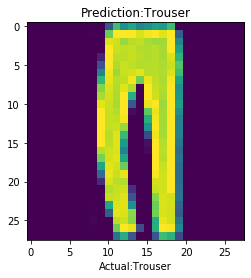

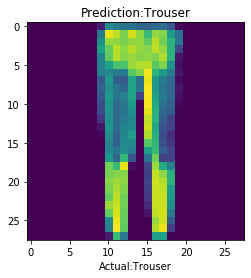

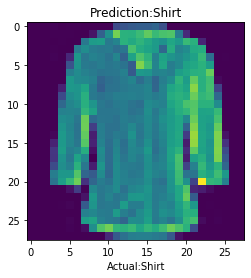

In [27]:
prediction = model_tanh.predict(test_images)#you get the predictions your model predicted on your test dataset

#for simple understanding a simple graph showing the predicted vs the actual item in our dataset
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel("Actual:"+ class_names[test_labels[i]])
    plt.title("Prediction:"+class_names[np.argmax(prediction[i])])
    plt.show()